# **Car price prediction**

In [325]:
# STEP 0: import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#apis
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
#modules
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#normal lib
from statistics import mean
import joblib
import seaborn as sns

# **STEP 1. LOOK AT THE BIG PICTURE**
The demand for cars in the world today is very high which leads to car prices being varied significantly. Car prices are influenced by different factors ranging from the model, type of the vehicle and external market condition. For example: fuel efficiency, performance and brands play an inportant role in pricing. Besides that, factors such as mordern technology, safety features and manufacturer warranties usually make the car more expensive. On the other hand, used cars can be consider to be more affordable to users based on mileage, market demand and condition. In general, car prices are determined by technological advancements, user requirments, trends and other economic factors.

From the dataset, car prices are pridicted from 16 features: Levy, Manufacturer, Model, Production Year, Category, Leather interior, Fuel type, Engine Volume, Mileage, Cylinders, Gear box type, drive wheels, doors, wheel, colors and air bag.



# **Step 2. GET THE DATA**
The dataset named “Car Price Prediction Challenge” and this is the link: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/data

In [326]:
#STEP 2: GET THE DATA 
raw_data = pd.read_csv(r'C:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\asm3\car_price_prediction.csv')

# **Step 3. EVALUATE DATA ANALYSIS**

**3.1 Data analyse:**

The dataset contains 19,237 rows (sample) and 18 columns (attribute). The attributes data include: Categorical Data, which are Normal and Ordinal Data; and Numerical Data, which are Discrete Data and Continuous Data.
- Categorical data (13): Levy, Manufacturer, Model, Category, Leather Interior, Fuel type, Engine volume, Mileage, Gear box type, Drive wheels, Doors, Wheel and Color
- Numerical data (5): ID, Price, Prod. year, Cylinders, Airbags


In [327]:
# STEP 3: EDA (VIEW ONLY)
# 3.1. briefly analyse the dataset with info, head and describe()
print("Dataset info:")
print(raw_data.info())

print("Data briefing: ")
print(raw_data.head())

print("Data describe: ")
raw_data.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 no

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


**3.1.1: Missing value, blank space**

The objective is the define any missing value throughout the dataset. The ‘isna()’ function, which evaluates each cell in the dataset to determine whether it contains a missing value, represented as ‘NaN’ (Not a Number). The final output displays the total number of missing values for each column in the dataset. At this stage, there are no missing value. 


In [328]:
print("Missing values: ")
print(raw_data.isna().sum())

Missing values: 
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


**3.1.2: Data reformating**

During the process of analyzing the dataset, there are attributes include incorrect values which leads to the accuracy of the output, which explains that reformating some data is essential.

**For ‘Mileage’ attribute:**
The data values such as 100000km or 200000km so we use the expression \d+, which looks for one or more digits. It then converts those extracted values into integers, removes any non-numeric characters like “km”. This will made those values become Continuous Data (Numerical Data) so that the next analysis step can give accurate results.


In [329]:
#reformat data (EDIT GENERAL)
#cleaning the mileague
raw_data['Mileage'] = raw_data['Mileage'].str.extract('(\d+)').astype(int)


**For ‘Engine volume’ attribute:**

There are two types of value appear in this column: engines with Turbo and engines without Turbo. Turbo engines have smaller size compared to the non-turbo engines for the same output power. Besides that, Turbo engines force more air into the combustion chamber, resulting in higher power and torque compared to a (non-turbo) engine.  Moreover, engines with turbo results in higher acceleration and fuel efficiency but required higher complex machine operation and maintenance.

Non-turbo engine (Naturally aspirated engines) has simple design, lower upfront and long-term costs and produces less power overall.

Create a new column named “Turbo” and checks if the word 'Turbo' appears in the 'Engine volume' column. If it does, set the value to 1 otherwise it is set to 0. The function ‘.map()’ then convert value ‘1’ and ‘0’ into ‘Yes’ and ‘No’. After that, it extract engine volume numerical value and convert into floating-point number.

A new column ‘Turbo’ is created, indicating whether the care design has a turbo engine (Yes) or naturally aspirated engine (No). The ‘Engine volume’ is now only contain the engine size as numerical value and clear any other non-numeric value (Turbo).


In [330]:
# extracting the enginer volume (EDIT GENREAL)
raw_data['Turbo'] = raw_data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
raw_data['Turbo'] = raw_data['Turbo'].map({1: 'Yes', 0: 'No'})

raw_data['Engine volume'] = raw_data['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)



**For ‘Levy’ attribute:**
As mention before, the dataset doesn’t include any missing values. However, in the ‘Levy’ column, we discovered that the symbol ‘ – ‘presents missing value. This is a critical issue that requires resolution because car prices increase based on taxes such as environmental charges, luxury taxes and excise duties. These costs are mostly passed on car owners, which leads to increasing in car price, especially imported or high- emission vehicles.

To solve this issue, we use function ‘replace (‘- ‘, 0)’ to replace any dash (which means missing value) into 0.  Then, the ‘pd.to_numeric ()’ function is applied to convert the whole column into numerical data value.
The ‘Levy’ attribute is performed in fully numeric, more clear and easier for data and statistical analysis.


In [331]:
# EDIT GENERAL
raw_data['Levy'] = raw_data['Levy'].replace('-', 0) # set into mean when cell = 0
raw_data['Levy'] = pd.to_numeric(raw_data['Levy'])

**For ‘Doors’ attribute:**
In the dataset, the ‘Doors’ column presents the number of doors in each vehicle. However, there are errors in the data values. 
We use ‘str.replace’ to replace any of the unreasonable values into the correct one:
- Replace ‘May’ with ‘5’
- Replace ‘Mar’ with ‘3’
- Replace ‘04’ with ‘4’
- Replace ‘02’ with ‘2’
This step ensures that all values appear in the ‘Doors’ column with present as numerical data. For example, if the cars have ‘Mar’ number of doors, it is corrected to ‘3’.

In [332]:
#production year to be a string (EDIT GENERAL)
raw_data['Doors'] = raw_data['Doors'].str.replace('May', '5')
raw_data['Doors'] = raw_data['Doors'].str.replace('Mar', '3')
raw_data['Doors'] = raw_data['Doors'].str.replace('04', '4')
raw_data['Doors'] = raw_data['Doors'].str.replace('02', '2')

**For ‘ID’ attribute:**
Data value in ‘ID’ column presents a unique identifier for each car in the dataset. Although it represents different car types, brands and models, it is not useful for analysis and data prediction because it is just a string of numbers and perform no specific or definite connection to other varibles. 
It does not contribute any aspects about the characteristics of the car nor the prediction of the price of the car. Therefore, it should be removed because it is unnecessary and does not affect the connection between other varibles and avoid overfitting in model prediction.

Overall:
- Mileage: is processed to presents only numbers (e.g., 200000 instead of 200000km)
- Engine volume: processed to presents only engine size in numerical data (e.g., 2.5) and column Turbo is added to with only ‘Yes’ or ‘No’ feature.
- Levy: Replace all missing values with 0, which is fully numeric
- Doors: Data presents only numeric value (number of doors) (e.g.,  2, 3, 4, 5)
- ID: Removed as unnecessary

In [333]:
#drop the ID column (EDIT GENERAL)
raw_data = raw_data.drop(columns = "ID")
raw_data.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


# **Identifying numerical and categorical features**

**Numerical and Categorical features:**

To present data as Numerical features and Categorical features, we retrieves all numerical columns from the dataset and extracts these columns  named ‘num_cols’. For categorical data types, subtracting all the stored numerical column from total column, which results in categorical column. It is clearly to analyze the structure in addition to data features.


In [334]:
#VIEW ONLY
cols=raw_data.columns
num_cols = raw_data._get_numeric_data()
num_cols= list(num_cols.columns)
cat_cols = list(set(cols) - set(num_cols))
cat_cols.sort()

#remove the color

print(f"Numerical features: {num_cols}")
print(f"Categorical features: {cat_cols}")


Numerical features: ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
Categorical features: ['Category', 'Color', 'Doors', 'Drive wheels', 'Fuel type', 'Gear box type', 'Leather interior', 'Manufacturer', 'Model', 'Turbo', 'Wheel']


In [335]:
raw_data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,No
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,No
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,No
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,No
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,No



**Scatter**
Scatter matrix plot supports data analytics to visualize and compare relationship between numerical variables. Each plot in the matrix presents the corelation between two specific variables. By applying this method, it is easier to detect trends, outliers, and correlation such as positive correlation, negative correlation and no correlation.
In this step, we import the scatter matrix from ‘pandas.plotting’ function to create a grid of scatter plots of each pair of the numerical values with visualization to present the relationship. The figure size is 12 in width and 8 in length to make the sketch more clearly and readable. ‘plt.tight_layout ()’ function is also used to make sure the matrix is clear without overlapping.


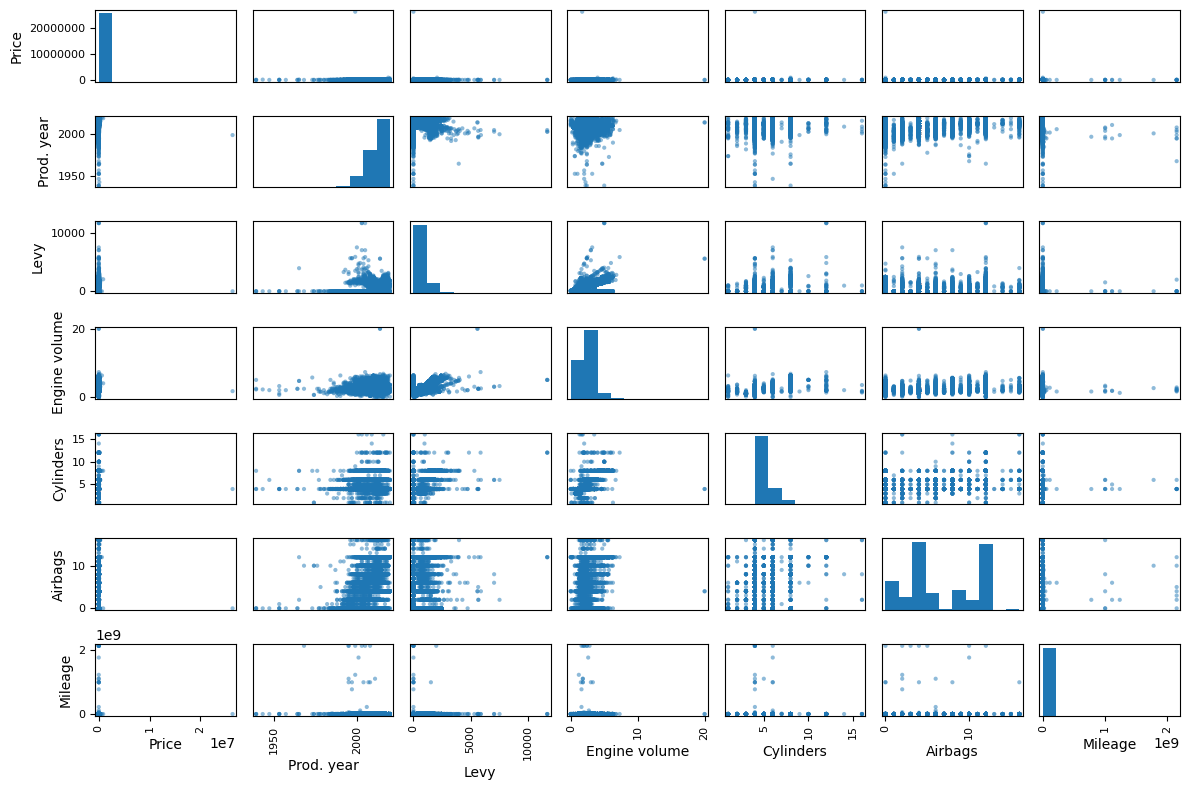

In [336]:
# 3.x. scatter matrix of numerical data (VIEW ONLY)
from pandas.plotting import scatter_matrix
def scatter(raw_data):
	attributes = ['Price', 'Prod. year', 'Levy', 'Engine volume', 'Cylinders', 'Airbags', 'Mileage'	]
	scatter_matrix(raw_data[attributes], figsize=(12, 8))
	plt.tight_layout()
	plt.show()
scatter(raw_data)

**Histogram:**

Histogram is simple but an influential tool in data analysis. It demonstrates the distribution of a numerical from a visual presentation, allowing data analyst to understand how the data is spread across its range and data’s frequency in a specific interval.
For example:
•	Identify skewness: Identify if the histogram is left-skewed or right-skewed of a variable
•	Detecting outliers: Point out data values that are highly different compared to the rest and also suggest potential data problems or extreme values.
•	Analysing data ranges and spread: Present data distribution over a specific scale (range and spread) across the intervals
•	Data transformation: data transform can be considered as a solution if the data distribution is imbalance. It is helpful in data modelling as improving to normalize if a distribution is skew-left or right to make the outcome result more suitable.


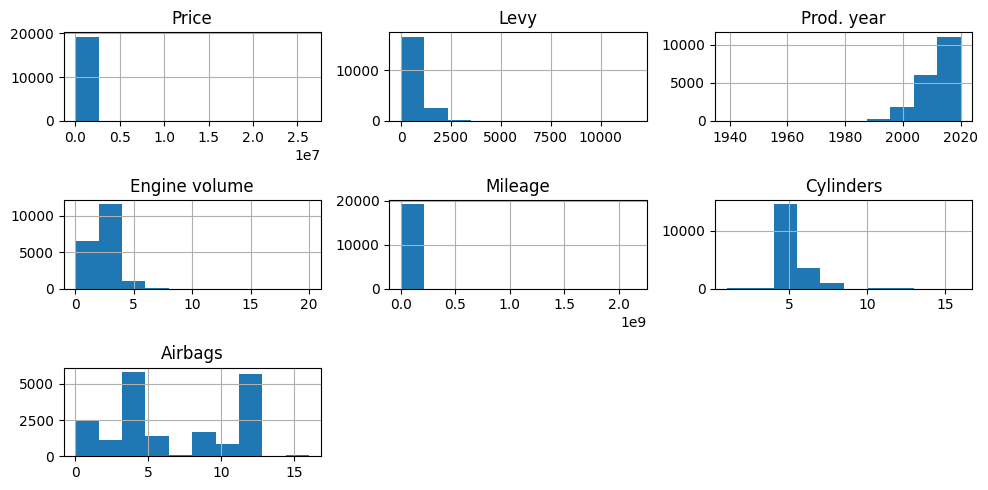

In [337]:
raw_data.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


**Correlation between numerical attributes before refining dataset:**

In [338]:
print("Before refining the dataset")
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix)

Before refining the dataset
                  Price      Levy  Prod. year  Engine volume   Mileage  \
Price          1.000000 -0.003701    0.012982       0.008753 -0.001758   
Levy          -0.003701  1.000000    0.364712       0.377438 -0.021034   
Prod. year     0.012982  0.364712    1.000000      -0.030906 -0.063501   
Engine volume  0.008753  0.377438   -0.030906       1.000000 -0.006289   
Mileage       -0.001758 -0.021034   -0.063501      -0.006289  1.000000   
Cylinders      0.007518  0.250950   -0.096797       0.778524 -0.001768   
Airbags       -0.012824  0.128032    0.236969       0.224441 -0.009201   

               Cylinders   Airbags  
Price           0.007518 -0.012824  
Levy            0.250950  0.128032  
Prod. year     -0.096797  0.236969  
Engine volume   0.778524  0.224441  
Mileage        -0.001768 -0.009201  
Cylinders       1.000000  0.176868  
Airbags         0.176868  1.000000  


**Correlation**
Correlation refers to a statistical measure that describes the degree and direction of a linear relationship between two variables. For “numeric to numeric” data values, in the range [-1, 1], where 0 implies no correlation, 1 implies the peak correlation(as one variable increases, the other increases) and -1 means inverse correlation (as one variable increases, the other decreases).
Top 5 most correlation: 
1)	Engine volume vs Cylinders
2)	Levy vs Engine volume
3)	Levy vs Prod. Year
4)	Airbags vs Prod. Year
5)	Cylinders vs Airbags

Top 5 least correlation:
1)	Price vs Levy
2)	Mileage vs Levy
3)	Mileage vs Airbags:
4)	Mileage vs Engine volume:
5)	Price vs Airbags:


                  Price      Levy  Prod. year  Engine volume   Mileage  \
Price          1.000000 -0.003701    0.012982       0.008753 -0.001758   
Levy          -0.003701  1.000000    0.364712       0.377438 -0.021034   
Prod. year     0.012982  0.364712    1.000000      -0.030906 -0.063501   
Engine volume  0.008753  0.377438   -0.030906       1.000000 -0.006289   
Mileage       -0.001758 -0.021034   -0.063501      -0.006289  1.000000   
Cylinders      0.007518  0.250950   -0.096797       0.778524 -0.001768   
Airbags       -0.012824  0.128032    0.236969       0.224441 -0.009201   

               Cylinders   Airbags  
Price           0.007518 -0.012824  
Levy            0.250950  0.128032  
Prod. year     -0.096797  0.236969  
Engine volume   0.778524  0.224441  
Mileage        -0.001768 -0.009201  
Cylinders       1.000000  0.176868  
Airbags         0.176868  1.000000  

 Price            1.000000
Prod. year       0.012982
Engine volume    0.008753
Cylinders        0.007518
Milea

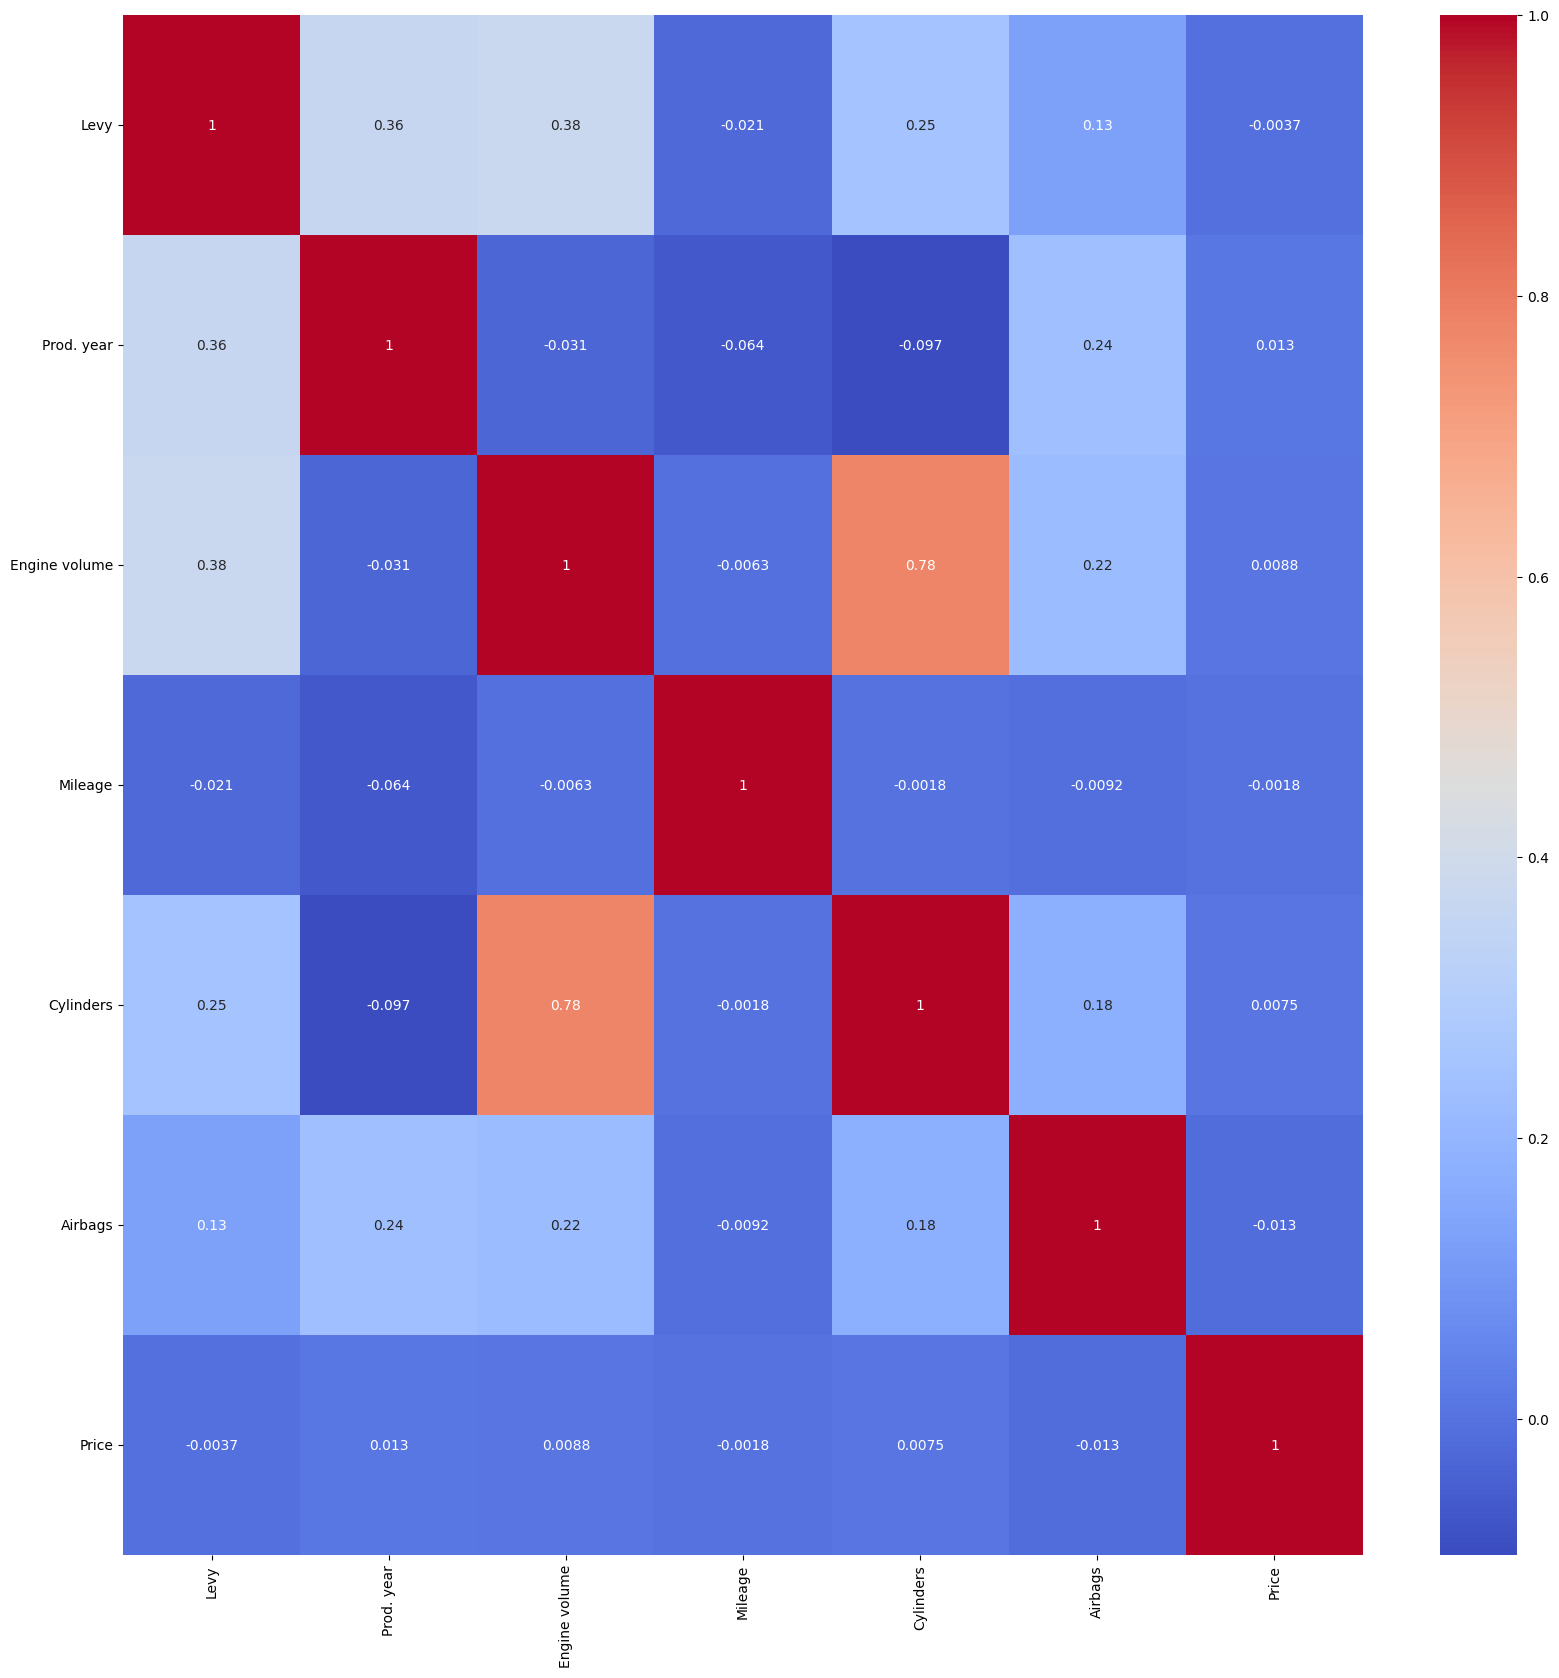

In [339]:
# 3.4 Correlation matrix
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Price"].sort_values(ascending=False)) # print correlation b/w a feature and other features


columns = list(corr_matrix.columns)
columns.remove('Price')
columns.append('Price')
corr_matrix = corr_matrix. loc[columns, columns]

# Create a heatmap from the correlation matrix
plt. figure(figsize=(20, 20))
sns. heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, fontsize=10)
# Rotate y-axis labels
plt.yticks(rotation=0, fontsize=10)
plt.show()

In [340]:
# #Pairplot
# sns.pairplot(raw_data)
# plt.show()

In [341]:
# # 3.x Try combining features
# corr_matrix = raw_data.corr(numeric_only=True)
# print(corr_matrix["PRICE IN MILLION VND"].sort_values(ascending=False)) # print correlation b/w a feature and other features
# raw_data.drop(columns = ["AREA PER ROOM", "TOTAL NUMBER OF ROOMS"], inplace=True) # remove experiment columns

# EDA on categorical features

In [342]:
# for feature in cat_cols:
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x=feature, data=raw_data)
#     plt.xlabel(feature.capitalize())
#     plt.ylabel('Frequency')
#     plt.title(f'Distribution of {feature.capitalize()}')
#     plt.xticks(rotation=45)
#     plt.show()


# Feature engineering

# STEP 4. PREPARE THE DATA 


In [343]:
# 4.1 Remove unused features


In [344]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)


Summary
        Variable   Skewness     Kurtosis          Mean    Median  \
0           Levy   2.376222    29.213355  6.325287e+02     642.0   
1     Prod. year  -2.082261    11.329766  2.010913e+03    2012.0   
2  Engine volume   2.186242    19.222583  2.307990e+00       2.0   
3        Mileage  38.896821  1598.756423  1.532236e+06  126000.0   
4      Cylinders   2.091083     6.486085  4.582991e+00       4.0   
5        Airbags   0.082012    -1.334021  6.582627e+00       6.0   

        Std Dev  Potential Normal  
0  5.677217e+02             False  
1  5.668673e+00             False  
2  8.778045e-01             False  
3  4.840387e+07             False  
4  1.199933e+00             False  
5  4.320168e+00              True  


In [345]:
def remove_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - factor * iqr
    upper_bound = Q3 + factor * iqr
    return lower_bound, upper_bound

# Assuming raw_data is a DataFrame and num_cols is a list of numerical columns
data_no_outliers = raw_data.copy()

# Remove rows where 'price' is less than 500
data_no_outliers = data_no_outliers[data_no_outliers['Price'] >= 500]

# data_no_outliers["Price_after_tax"] = data_no_outliers["Price"] + data_no_outliers["Levy"] 
attributes = ['Prod. year', 'Engine volume', 'Mileage', 'Airbags', 'Price', 'Levy']


# for attribute in attributes:
#     low, high = remove_outliers_iqr(data_no_outliers[attribute], factor=1.5)
#     print(attribute, low, high)
#     # Filter out rows where the attribute is an outlier
#     outliers = (data_no_outliers[attribute] < low) | (data_no_outliers[attribute] > high)
    
#     # Drop the outlier rows
#     data_no_outliers = data_no_outliers[~outliers]

data_no_outliers.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.757400e+04,17574.000000,17574.000000,17574.000000,1.757400e+04,17574.000000,17574.000000
mean,2.028751e+04,619.602765,2010.847502,2.287072,1.475579e+06,4.556276,6.480084
std,1.993082e+05,563.856440,5.679169,0.858032,4.724765e+07,1.183880,4.201536
min,5.000000e+02,0.000000,1943.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,7.561500e+03,0.000000,2009.000000,1.800000,7.001425e+04,4.000000,4.000000
50%,1.442600e+04,642.000000,2012.000000,2.000000,1.248710e+05,4.000000,4.000000
75%,2.352100e+04,891.000000,2015.000000,2.500000,1.850000e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


In [346]:
# Initialize the imputer
imputer = SimpleImputer(missing_values=0, strategy="median", copy=True)

# Apply imputer to the numerical columns
data_no_outliers[num_cols] = imputer.fit_transform(data_no_outliers[num_cols])


In [347]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(data_no_outliers.drop(['Price'], axis =1))
print("Summary")
print(normality_df)

Summary
        Variable   Skewness     Kurtosis          Mean    Median  \
0           Levy   7.262529   139.578698  8.620265e+02     781.0   
1     Prod. year  -1.730721     6.408798  2.010848e+03    2012.0   
2  Engine volume   2.370435    22.889287  2.287868e+00       2.0   
3        Mileage  39.715290  1669.054679  1.479942e+06  128000.0   
4      Cylinders   2.195948     7.331829  4.556276e+00       4.0   
5        Airbags   0.371012    -1.291505  7.151303e+00       6.0   

        Std Dev  Potential Normal  
0  3.848055e+02             False  
1  5.679169e+00             False  
2  8.568360e-01             False  
3  4.724752e+07             False  
4  1.183880e+00             False  
5  3.539814e+00              True  


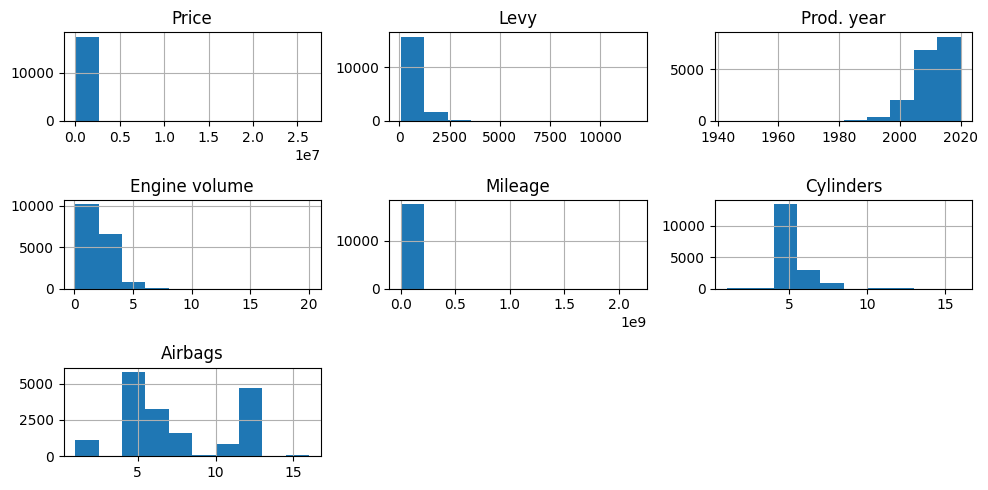

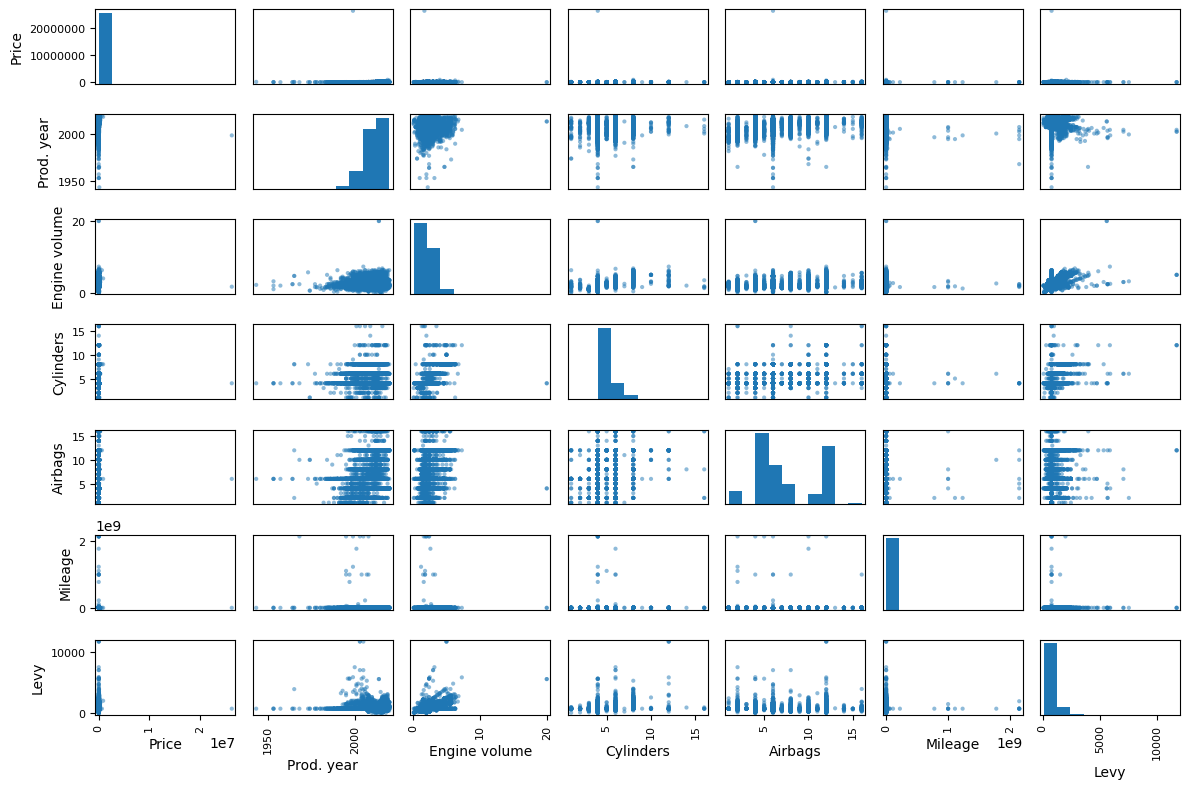

In [348]:
data_no_outliers.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()

from pandas.plotting import scatter_matrix
def scatter(data_no_outliers):
	attributes = ['Price', 'Prod. year', 'Engine volume', 'Cylinders', 'Airbags', 'Mileage', 'Levy']
	scatter_matrix(data_no_outliers[attributes], figsize=(12, 8))
	plt.tight_layout()
	plt.show()
scatter(data_no_outliers)

                  Price      Levy  Prod. year  Engine volume   Mileage  \
Price          1.000000  0.005814    0.014700       0.011846 -0.001764   
Levy           0.005814  1.000000   -0.017931       0.503649  0.004615   
Prod. year     0.014700 -0.017931    1.000000      -0.042208 -0.063544   
Engine volume  0.011846  0.503649   -0.042208       1.000000 -0.007266   
Mileage       -0.001764  0.004615   -0.063544      -0.007266  1.000000   
Cylinders      0.010241  0.412324   -0.104655       0.770800 -0.003855   
Airbags       -0.005611  0.110783    0.246654       0.321583 -0.005722   

               Cylinders   Airbags  
Price           0.010241 -0.005611  
Levy            0.412324  0.110783  
Prod. year     -0.104655  0.246654  
Engine volume   0.770800  0.321583  
Mileage        -0.003855 -0.005722  
Cylinders       1.000000  0.289257  
Airbags         0.289257  1.000000  

 Price            1.000000
Prod. year       0.014700
Engine volume    0.011846
Cylinders        0.010241
Levy 

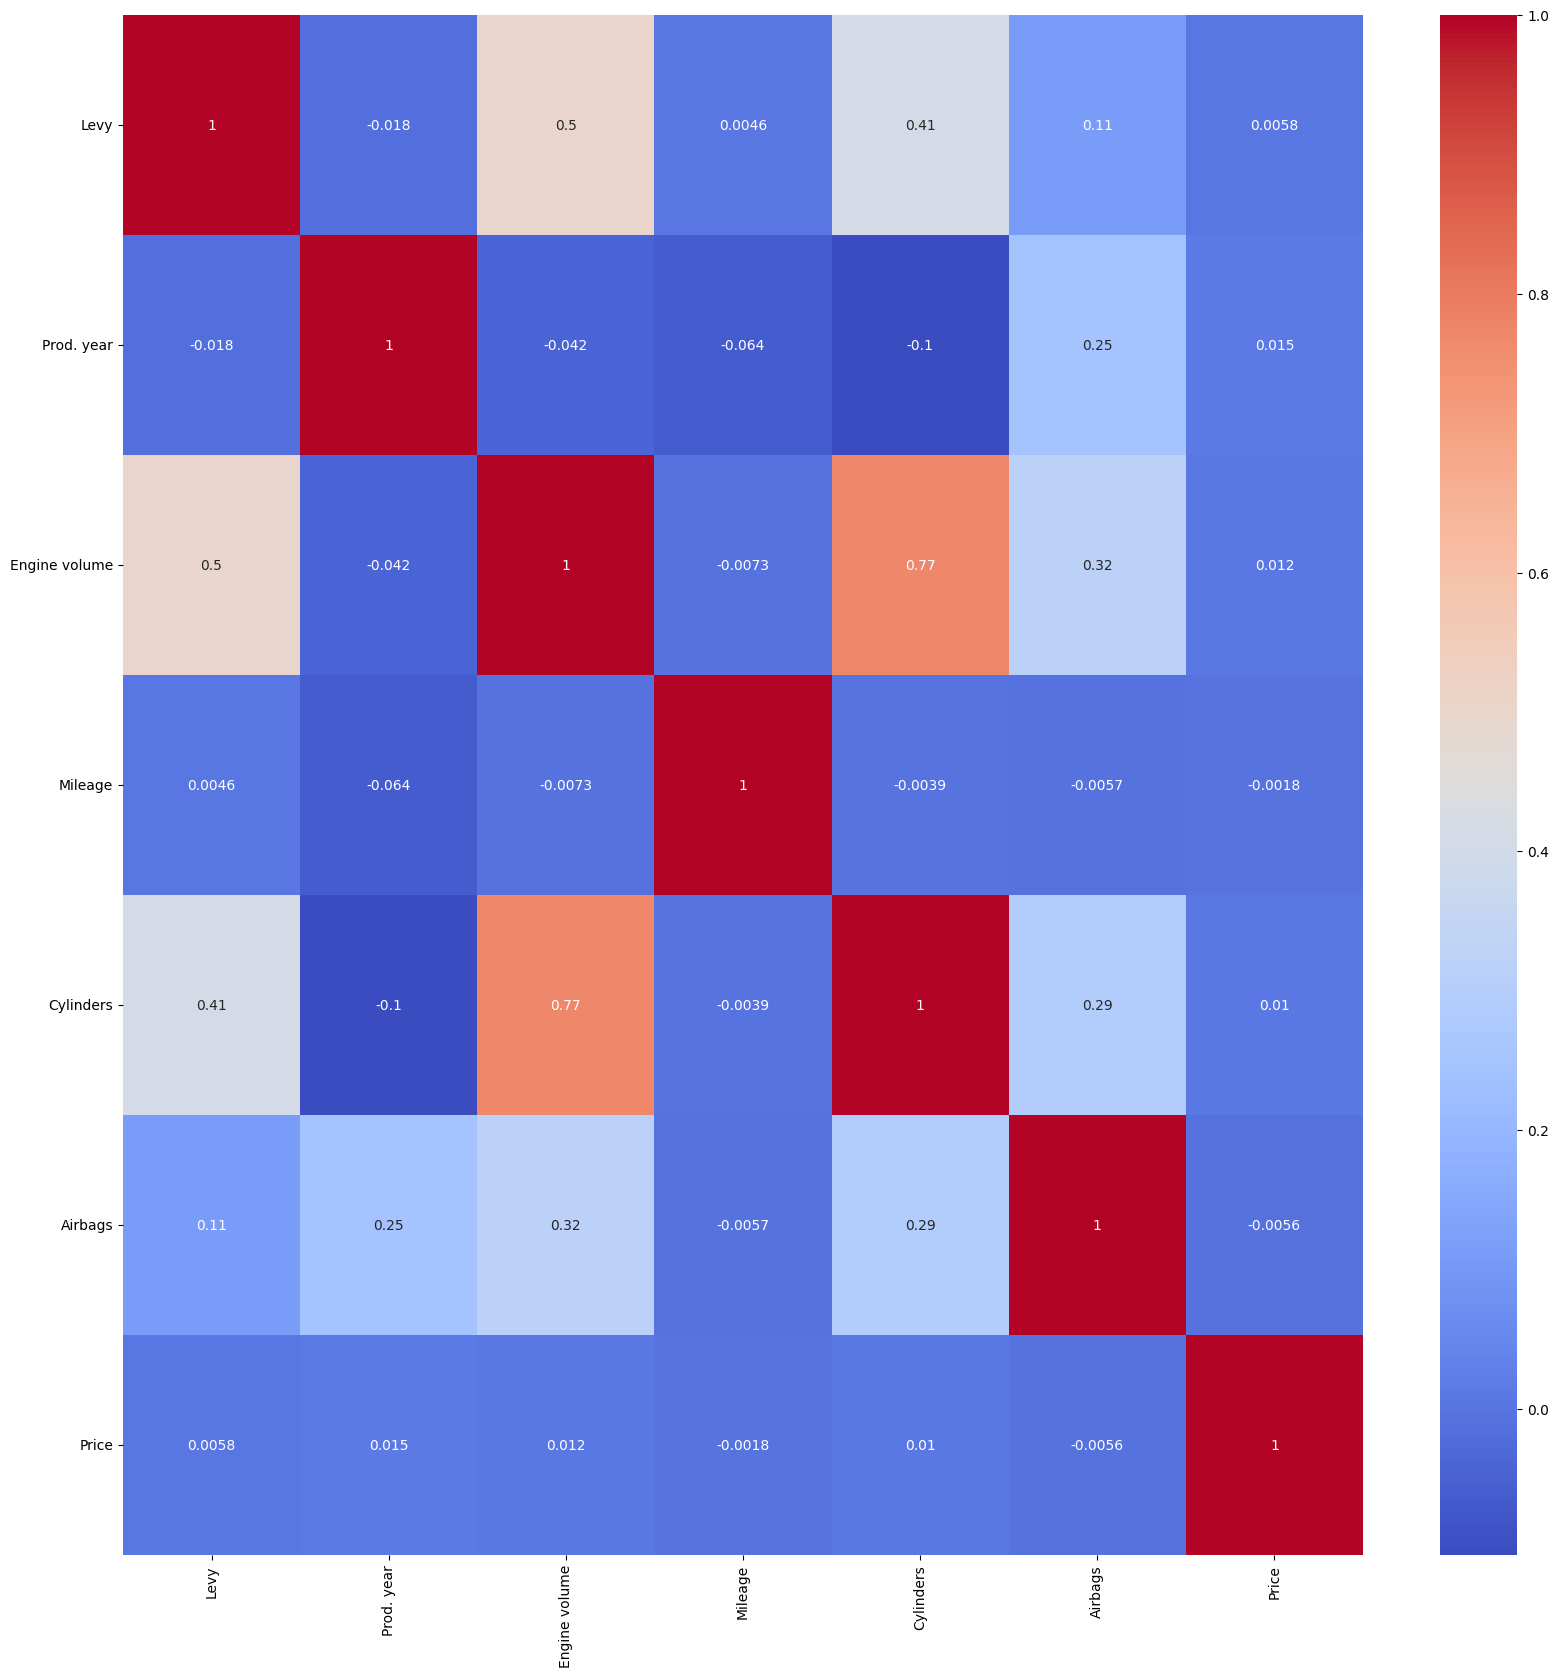

In [349]:
# 3.4 Correlation matrix
corr_matrix = data_no_outliers.corr(numeric_only=True)
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

columns = list(corr_matrix.columns)

columns.remove('Price')
columns.append('Price')
corr_matrix = corr_matrix.loc[columns, columns]

# Create a heatmap from the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, fontsize=10)
# Rotate y-axis labels
plt.yticks(rotation=0, fontsize=10)
plt.show()

In [350]:
data_no_outliers.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399.0,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12.0,No
1,16621.0,1018.0,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8.0,No
2,8467.0,781.0,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2.0,No
3,3607.0,862.0,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,6.0,No
4,11726.0,446.0,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4.0,No


In [351]:
data_no_outliers.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.757400e+04,17574.000000,17574.000000,17574.000000,1.757400e+04,17574.000000,17574.000000
mean,2.028751e+04,862.026516,2010.847502,2.287868,1.479942e+06,4.556276,7.151303
std,1.993082e+05,384.805459,5.679169,0.856836,4.724752e+07,1.183880,3.539814
min,5.000000e+02,87.000000,1943.000000,0.100000,1.300000e+01,1.000000,1.000000
25%,7.561500e+03,730.000000,2009.000000,1.800000,7.790875e+04,4.000000,4.000000
50%,1.442600e+04,781.000000,2012.000000,2.000000,1.280000e+05,4.000000,6.000000
75%,2.352100e+04,891.000000,2015.000000,2.500000,1.850000e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


In [352]:
# Remove Model
data_no_outliers = data_no_outliers.drop(columns=['Model'])

In [353]:
data_no_outliers.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399.0,LEXUS,2010.0,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12.0,No
1,16621.0,1018.0,CHEVROLET,2011.0,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8.0,No
2,8467.0,781.0,HONDA,2006.0,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2.0,No
3,3607.0,862.0,FORD,2011.0,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,6.0,No
4,11726.0,446.0,HONDA,2014.0,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4.0,No


In [354]:
num_cols = data_no_outliers._get_numeric_data().columns.tolist()  
cat_cols = list(set(data_no_outliers.columns) - set(num_cols))  

print(f"Numerical features: {num_cols}")
print(f"Categorical features: {cat_cols}")

Numerical features: ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
Categorical features: ['Wheel', 'Turbo', 'Fuel type', 'Category', 'Doors', 'Manufacturer', 'Drive wheels', 'Color', 'Gear box type', 'Leather interior']


In [355]:
# One-hot Encoder
df_cat_encoded = pd.get_dummies(data_no_outliers[cat_cols], drop_first=True)

df_final = pd.concat([data_no_outliers[num_cols], df_cat_encoded], axis=1)

print(f"Final DataFrame shape: {df_final.shape}")
df_final.head()

Final DataFrame shape: (17574, 111)


,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Wheel_Right-hand drive,Turbo_Yes,Fuel type_Diesel,...,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Leather interior_Yes
0,13328.0,1399.0,2010.0,3.5,186005.0,6.0,12.0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,16621.0,1018.0,2011.0,3.0,192000.0,6.0,8.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,8467.0,781.0,2006.0,1.3,200000.0,4.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3607.0,862.0,2011.0,2.5,168966.0,4.0,6.0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,11726.0,446.0,2014.0,1.3,91901.0,4.0,4.0,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [356]:
# Separate features (X) and target variable (y)
# X = df_final.drop(columns=['Price']) 
# y = df_final['Price']

Random select

In [357]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
trainset, testset = train_test_split(df_final, test_size=0.2, random_state=42)

# attributes.remove('Price')
for attribute in attributes:
    low, high = remove_outliers_iqr(trainset[attribute], factor=1.5)
    print(attribute, low, high)
    # Filter out rows where the attribute is an outlier
    outliers = (trainset[attribute] < low) | (trainset[attribute] > high)
    
    # Drop the outlier rows
    trainset = trainset[~outliers]

trainset.describe()

y_train = trainset["Price"].copy()
X_train = trainset.drop(columns="Price")

y_test = testset["Price"].copy()
X_test = testset.drop(columns="Price")




# Apply StandardScaler to the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.fit_transform(X_test)

Prod. year 2000.0 2024.0
Engine volume 0.7500000000000002 3.55
Mileage -82500.0 337500.0
Airbags -8.0 24.0
Price -14823.5 47284.5
Levy 305.0 1225.0


# **Split first then remove outliers**

In [358]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(10264, 110)
(10264,)
(3515, 110)
(3515,)


In [359]:
# # Linear Regression 
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# lr_model = LinearRegression()
# lr_model.fit(X_train_scaled, y_train)

# # Make predictions on the test set
# # y_pred = lr_model.predict(X_test_scaled)

# # valuate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# rmse = root_mean_squared_error(y_test,y_pred)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"R-squared (R^2): {r2}")

In [360]:
from sklearn.metrics import mean_squared_error, r2_score

def r2score_and_rmse(model, train_data, labels):
    r2score = model.score(train_data, labels)
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse

def store_model(model, model_name=""):
    # NOTE: sklearn.joblib faster than pickle of Python
    # INFO: can store only ONE object in a file
    if model_name == "":
        model_name = type(model).__name__
    joblib.dump(model, 'models/' + model_name + '_model.pkl')

def load_model(model_name):
    model = joblib.load('models/' + model_name + '_model.pkl')

    return model


In [361]:
new_training =1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

if new_training:
  model = LinearRegression()
  model.fit(X_train_scaled, y_train)
#   store_model(model, model_name="LinearRegression")
else:
  model = load_model("LinearRegression")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)

print('_______SCORE FOR LINEAR REGRESSION_________')
print('\nR2 score: ', r2score) 
print('RMSE score: ', rmse)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_______SCORE FOR LINEAR REGRESSION_________

R2 score:  0.46139649065109034
RMSE score:  7964.8977142280155

Predictions:  [29299.6 11013.9 15799.5 10014.4 25253.4 32128.6 20076.2 11457.9 -1430.1]
Labels:       [35902.0, 8781.0, 2430.0, 2352.0, 14113.0, 30326.0, 15053.0, 706.0, 3500.0]


In [362]:
new_training =1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

if new_training:
  model = LinearRegression()
  model.fit(X_train, y_train)
#   store_model(model, model_name="LinearRegression")
else:
  model = load_model("LinearRegression")

r2score, rmse = r2score_and_rmse(model, X_train, y_train)

print('_______SCORE FOR LINEAR REGRESSION_________')
print('\nR2 score: ', r2score) 
print('RMSE score: ', rmse)

print("\nPredictions: ", model.predict(X_train[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_______SCORE FOR LINEAR REGRESSION_________

R2 score:  0.4613965739040101
RMSE score:  7964.897098653661

Predictions:  [29299.  11013.2 15798.1 10012.7 25248.4 32128.2 20077.  11459.9 -1426.3]
Labels:       [35902.0, 8781.0, 2430.0, 2352.0, 14113.0, 30326.0, 15053.0, 706.0, 3500.0]


In [363]:
new_training = 1  # Flag to control whether to train a new model or load an existing one
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

if new_training: 
    model = RandomForestRegressor(n_estimators=5)
    model.fit(X_train, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train, y_train)
    # store_model(model, model_name="RandomForestRegressor")
else:
    model = load_model("RandomForestRegressor")

# Analyze performance
print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
print('\n R2 Score:', r2score)
print('\n RMSE:', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))


_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score: 0.9457063486086525

 RMSE: 2528.832932379744

Predictions:  [37317.2  5974.2 10866.4  2352.  13924.8 30326.  15555.    706.   4787. ]
Labels:       [35902.0, 8781.0, 2430.0, 2352.0, 14113.0, 30326.0, 15053.0, 706.0, 3500.0]


In [364]:
new_training = 1  # Flag to control whether to train a new model or load an existing one
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

if new_training: 
    model = RandomForestRegressor(n_estimators=5)
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    # store_model(model, model_name="RandomForestRegressor")
else:
    model = load_model("RandomForestRegressor")

# Analyze performance
print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
print('\n R2 Score:', r2score)
print('\n RMSE:', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))


_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score: 0.9405139190755296

 RMSE: 2646.9960445361667

Predictions:  [36573.2  9565.  18643.8  2352.  14426.4 30326.  20259.   1819.2  3866.2]
Labels:       [35902.0, 8781.0, 2430.0, 2352.0, 14113.0, 30326.0, 15053.0, 706.0, 3500.0]


In [366]:
# new_training = 1  # Flag to control whether to train a new model or load an existing one
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import Ridge

# if new_training: 
#     model = RandomForestRegressor(n_estimators=5)
#     model.fit(X_test_scaled, y_test)

#     # Calculate R2 score and RMSE
#     r2score, rmse = r2score_and_rmse(model, X_test_scaled, y_test)
#     # store_model(model, model_name="RandomForestRegressor")
# else:
#     model = load_model("RandomForestRegressor")

# # Analyze performance
# print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
# print('\n R2 Score:', r2score)
# print('\n RMSE:', rmse)

# # Display some predictions and corresponding labels
# print("\nPredictions: ", model.predict(X_test_scaled[0:9]).round(decimals=1))
# print("Labels:      ", list(y_train[0:9]))


_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score: 0.8982405094910786

 RMSE: 6874.056691662315

Predictions:  [ 21162.2   9722.   13818.4    941.   25088.8 103327.4  22951.8  21137.4
   8781. ]
Labels:       [35902.0, 8781.0, 2430.0, 2352.0, 14113.0, 30326.0, 15053.0, 706.0, 3500.0]


In [369]:
# from sklearn.linear_model import Lasso
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming X_train_scaled and X_train_scaled are already preprocessed
# # and y_train, y_test are the target variables

# # 1. Initialize the Lasso model with a regularization strength (alpha)
# # You can tune the '
# if new_training: 
#     model = Lasso(alpha=0.1, random_state=42)
#     model.fit(X_train_scaled, y_train)

#     # Calculate R2 score and RMSE
#     r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
#     # store_model(model, model_name="RandomForestRegressor")
# else:
#     model = load_model("RandomForestRegressor")

# # Analyze performance
# print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
# print('\n R2 Score:', r2score)
# print('\n RMSE:', rmse)

# # Display some predictions and corresponding labels
# print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
# print("Labels:      ", list(y_train[0:9]))

_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score: 0.46138625192357263

 RMSE: 7964.973419295313

Predictions:  [29297.3 11017.8 15798.5 10014.5 25244.9 32131.7 20077.6 11459.5 -1423.5]
Labels:       [35902.0, 8781.0, 2430.0, 2352.0, 14113.0, 30326.0, 15053.0, 706.0, 3500.0]


c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+11, tolerance: 1.209e+08
  model = cd_fast.enet_coordinate_descent(
